# requirements
### install packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#run this cell if you run this on google colab

!pip install tqdm
!pip install yolov4
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


     |████████████████████████████████| 42 kB 886 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for yolov4: filename=yolov4-3.2.0-cp37-cp37m-linux_x86_64.whl size=135669 sha256=864d701bc04f5c78e4297403926c4ababe0d7510bf39ddfbf088b5d66735a62c
  Stored in directory: /root/.cache/pip/wheels/2f/b0/9a/cb8f2f279a59c0e8c874074df1333645b33f2f9c3cb58498de
Successfully built yolov4
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64

### import modules

In [ ]:
import os
import glob
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

from utils.preprocess import TFRecordConverter
from utils.tfrecordViewer import TFRecordLoader, TFRecordViewer

# 데이터 분석 


## 데이터 TFRecord화 및 불러오기 

In [ ]:
converter = TFRecordConverter(origin_path='/Volumes/External SSD for Data/NEXTLab/contents/train/',
                              data_path='data', label_path='label', output_dir='tfrecord/', n_shards=10)
converter.convert()

  0%|          | 0/354587 [00:00<?, ?it/s]

In [ ]:
tfrecord_list = []
for i in range(1, 10):
    tfrecord_list += [f'/content/drive/MyDrive/ML_SUPPORT/contents/tfrecord/00{i}-35459.tfrecord']
tfrecord_list += [f'/content/drive/MyDrive/ML_SUPPORT/contents/tfrecord/010-35456.tfrecord']

loader = TFRecordLoader(tfrecord_path=tfrecord_list)

loadedRecord = loader.load()

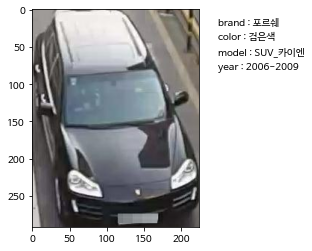

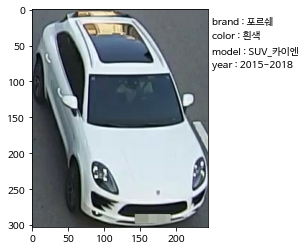

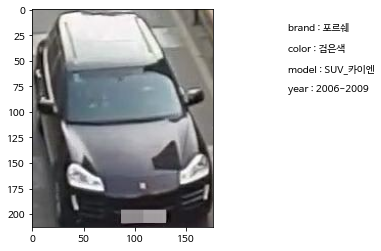

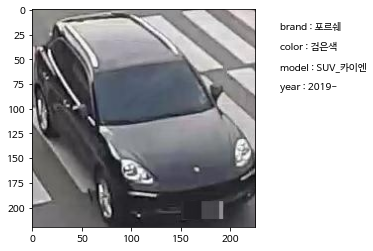

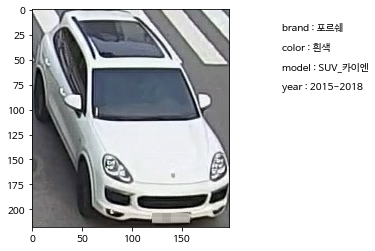

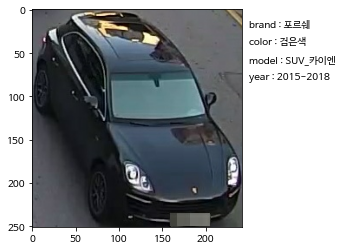

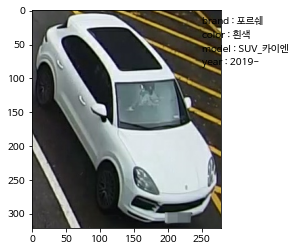

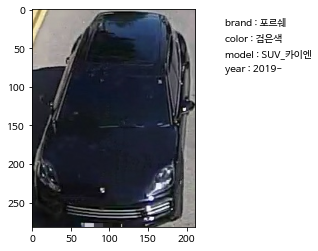

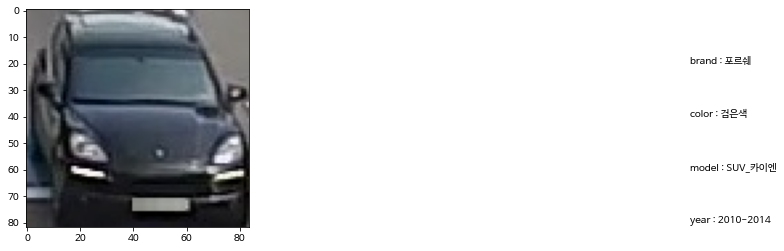

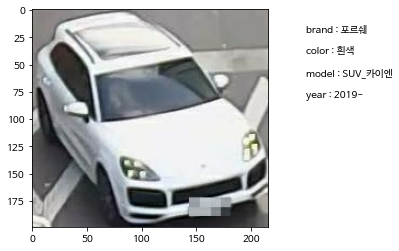

In [ ]:
viewer = TFRecordViewer(10)
viewer.show(loadedRecord)

## 데이터 살펴보기 

### Dependencies

In [ ]:
import pandas as pd
import numpy as np

### 데이터 분포

In [ ]:
def TensorDecodeDF(tfrecord):
    df = pd.DataFrame()
    for feature in tqdm(tfrecord):
        path, brand, color, color, model, year, image = viewer._tensor_decode(feature)
        df = df.append(pd.DataFrame(data=[brand, color, model, year], index=['브랜드', '색상', '모델', '연식']).transpose())
    return df

In [ ]:
dataframe = TensorDecodeDF(loadedRecord)

dataframe.head(5)

0it [00:00, ?it/s]

,브랜드,색상,모델,연식
0,포르쉐,검은색,SUV_카이엔,2006-2009
0,포르쉐,흰색,SUV_카이엔,2015-2018
0,포르쉐,검은색,SUV_카이엔,2006-2009
0,포르쉐,검은색,SUV_카이엔,2019-
0,포르쉐,흰색,SUV_카이엔,2015-2018


In [ ]:
dataframe.to_csv('/content/drive/MyDrive/ML_SUPPORT/contents/NEXTLab_Report.csv')

In [36]:
dataframe = pd.read_csv('/content/drive/MyDrive/ML_SUPPORT/contents/NEXTLab_Report.csv')

model_year = []
for model, year in zip(dataframe['모델'], dataframe['연식']):
    model_year += [model + '_' + year]
dataframe['모델_연식'] = model_year

models = []
for model in dataframe['모델']:
    models += [model.split('_')[0]]
dataframe['차종'] = models

year_start = []
for year in dataframe['연식']:
    year_start += [year.split('-')[0]]

dataframe['연식_from'] = year_start

In [37]:
dataframe.columns

Index(['Unnamed: 0', '브랜드', '색상', '모델', '연식', '모델_연식', '차종', '연식_from'], dtype='object')

In [38]:
from utils.visualization import Visualization

visual = Visualization(dataframe)

/content/utils/visualization.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  explode=explode);


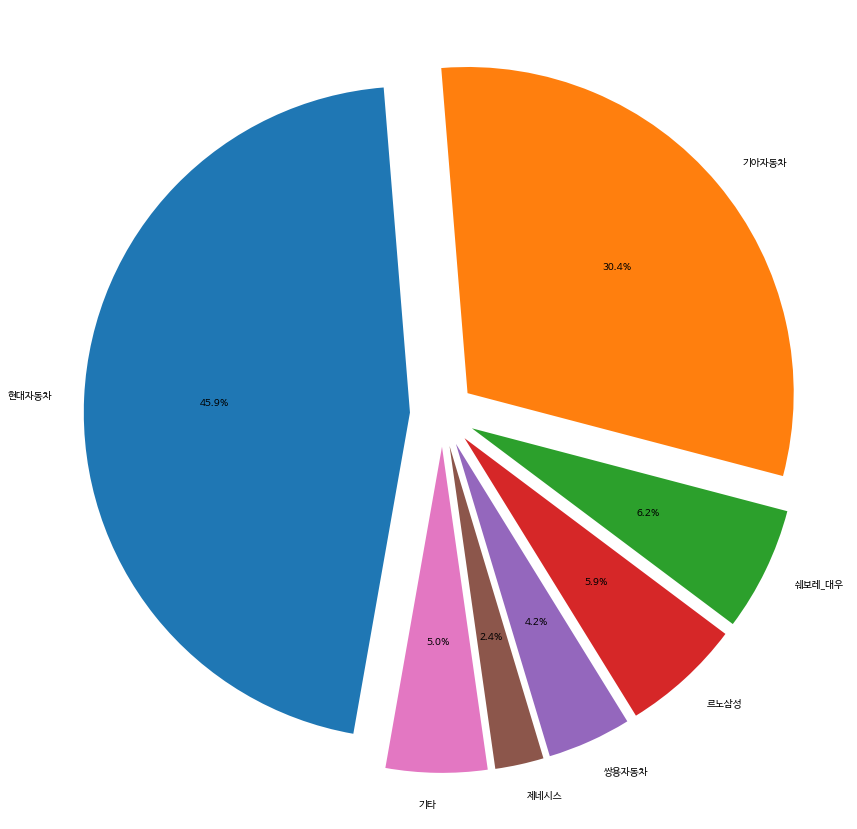

In [ ]:
visual.plot(name='브랜드', threshold=5000)

In [ ]:
dataframe['브랜드'].unique()

array(['포르쉐', '닛산', '인피니티', '아우디', '포드', '테슬라', '재규어', '기아자동차', '지프',
       '쉐보레_대우', '폭스바겐', '푸조', '랜드로버', '벤츠', '쌍용자동차', '혼다', '도요타', 'BMW',
       '볼보', '렉서스', '르노삼성', '현대자동차', '제네시스', '미니'], dtype=object)

/content/utils/visualization.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  explode=explode);


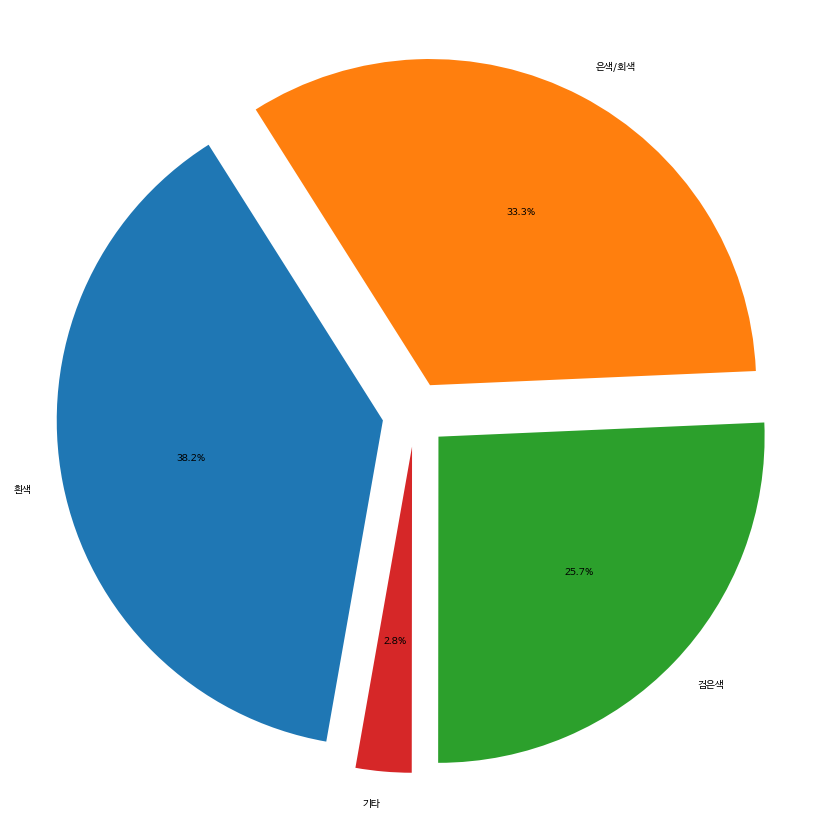

In [ ]:
visual.plot(name='색상', threshold=5000)

In [ ]:
dataframe['색상'].unique()

array(['검은색', '흰색', '은색/회색', '기타', '빨간색', '파란색', '주황색', '노란색'],
      dtype=object)

/content/utils/visualization.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  explode=explode);


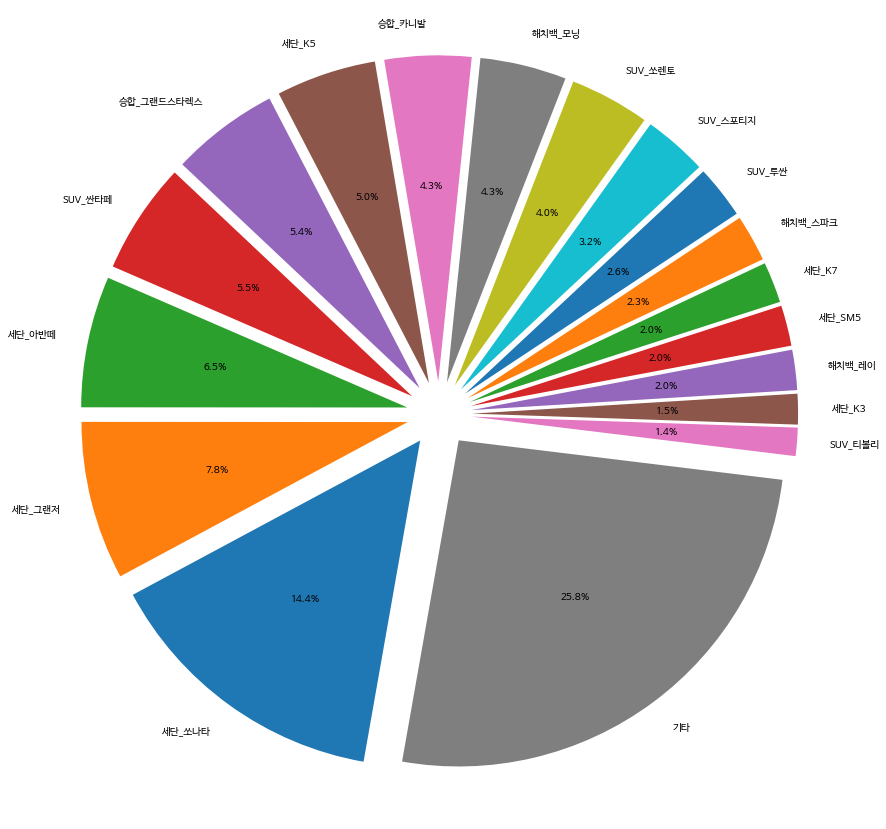

In [ ]:
visual.plot(name='모델', threshold=4000)

In [25]:
dataframe['모델'].unique()

array(['SUV_카이엔', 'SUV_로그', 'SUV_쥬크', 'SUV_엑스트레일', 'SUV_큐브', 'SUV_패스파인더',
       'SUV_Q30', 'SUV_QX50', 'SUV_QX60', 'SUV_QX30', 'SUV_Q3', 'SUV_Q5',
       'SUV_Q7', 'SUV_e트론', 'SUV_Q8', 'SUV_익스플로러', 'SUV_모델X', 'SUV_F-페이스',
       'SUV_E-페이스', 'SUV_쏘렌토', 'SUV_스포티지', 'SUV_모하비', 'SUV_니로', 'SUV_카렌스',
       'SUV_쏘울', 'SUV_니로_EV', 'SUV_스토닉', 'SUV_셀토스', 'SUV_그랜드체로키',
       'SUV_레니게이드', 'SUV_랭글러', 'SUV_체로키', 'SUV_컴패스', 'SUV_트렉스', 'SUV_올란도',
       'SUV_캡티바', 'SUV_대우_윈스톰', 'SUV_트레일블레이저', 'SUV_티구안', 'SUV_투아렉',
       'SUV_3008', 'SUV_2008', 'SUV_5008', 'SUV_이보크', 'SUV_디스커버리',
       'SUV_레인지로버', 'SUV_GLE클래스', 'SUV_GLC클래스', 'SUV_GLA클래스',
       'SUV_GLK클래스', 'SUV_GLS클래스', 'SUV_티볼리', 'SUV_코란도 투리스모', 'SUV_렉스턴',
       'SUV_코란도스포츠', 'SUV_코란도', 'SUV_엑티언', 'SUV_카이런', 'SUV_무쏘',
       'SUV_CR-V', 'SUV_파일럿', 'SUV_라브4', 'SUV_X6', 'SUV_X4', 'SUV_X5',
       'SUV_X1', 'SUV_X3', 'SUV_X7', 'SUV_XC60', 'SUV_XC90', 'SUV_XC40',
       'SUV_RX', 'SUV_NX', 'SUV_QM6', 'SUV_QM3', 'SUV_XM3', 'SUV_QM5',
       'SUV

/content/utils/visualization.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  explode=explode);


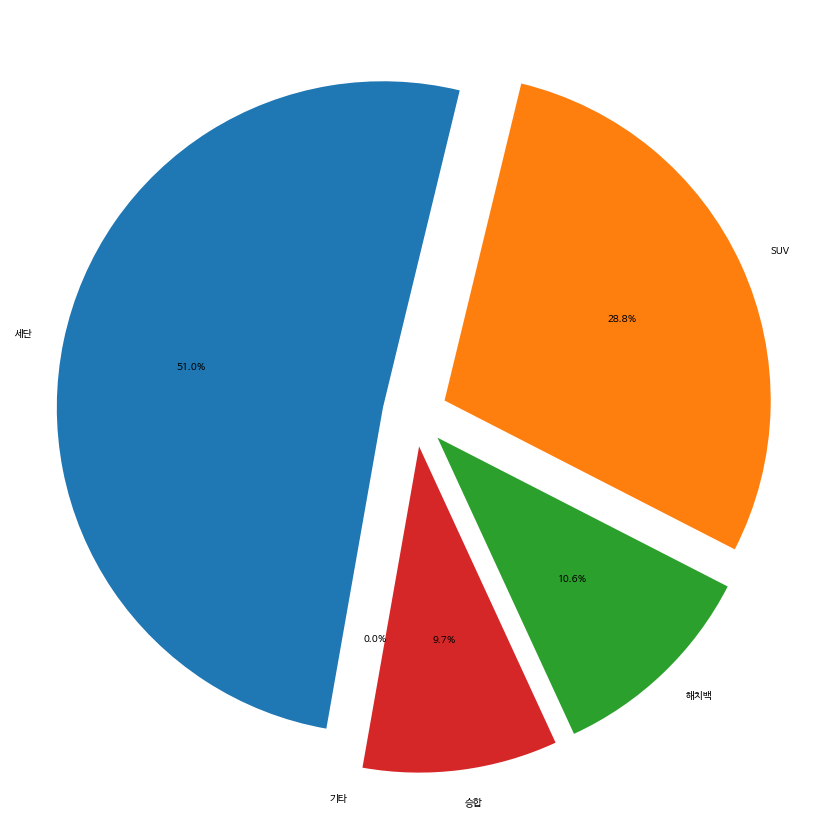

In [ ]:
visual.plot(name='차종', threshold=4000)

/content/utils/visualization.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  explode=explode);


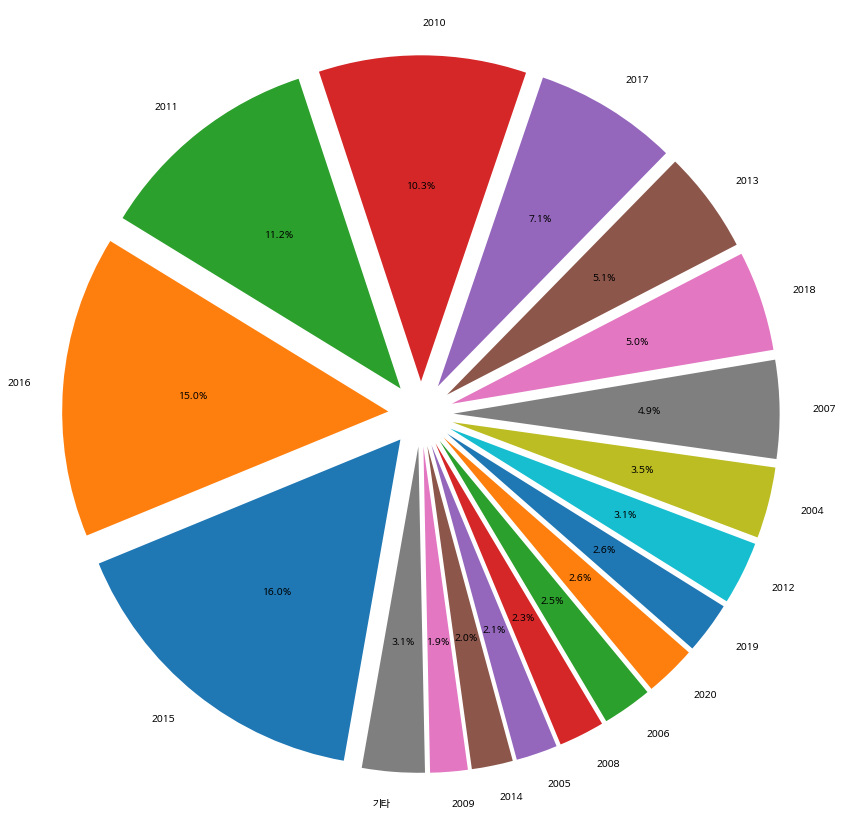

In [39]:
visual.plot(name='연식_from', threshold=5000)

In [40]:
dataframe['연식_from'].unique()

array(['2006', '2015', '2019', '2010', '2014', '2017', '2009', '2013',
       '2021', '2016', '2012', '2008', '2020', '2011', '2018', '2001',
       '2004', '2002', '1993', '1999', '2005', '2007', '2003', '1996',
       '1992', '2000', '1994', '1991', '1997', '1998', '1995'],
      dtype=object)

/content/utils/visualization.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  explode=explode);


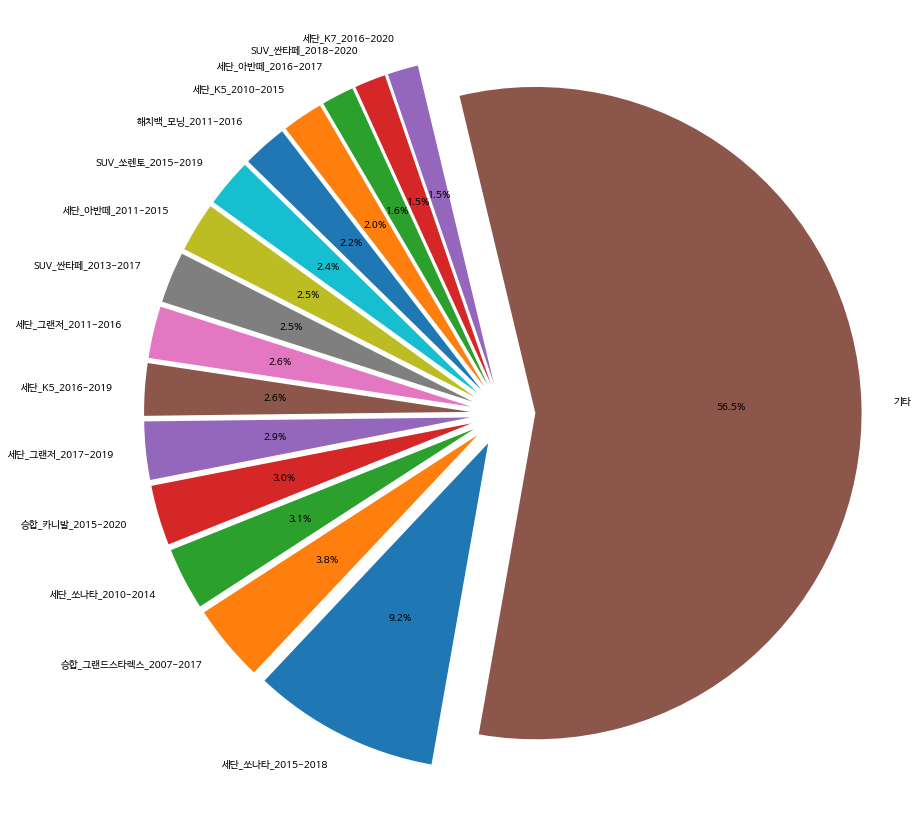

In [ ]:
visual.plot(name='모델_연식', threshold=5000);

In [32]:
len(dataframe['모델_연식'].unique())

506

# 차량 위치 확인(YOLOv4)